In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [16]:
data = pd.read_csv('/home/maryam/Documents/Thesis/Service Report-Week.csv')
dataTotalTraffic = data[["Total Traffic"]]

In [17]:
dataTotalTraffic

,Total Traffic
0,16.75
1,19.29
2,12.06
3,13.09
4,14.12
...,...
124,19.37
125,12.92
126,16.84
127,17.94


In [15]:
data

,week,Value,Total Traffic,3G-CS TRAFFIC (Million Erl),2G Traffic \n(Million Erl),CC2,CC3,CSQI,OCS QI,SMS Number (Million),...,3G Carrier,4G Carrier,2G CS- Drop,3G CS- Drop,Weighted CS drop,2G CS- CSSR,3G CS- CSSR,Weighted CS-CSSR,4G Carrier per 5MHz,Avg 4G Carrier in MHz
0,W01-1398,Avg,16.75,7.448,9.30,83.38,89.30,96.40,98.06,679,...,137168.0,55083.0,0.37,0.13,0.26,98.85,99.73,99.24,"192,913",17.55
1,W01-1398,Max,19.29,8.955,10.34,NaN,NaN,NaN,NaN,808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W01-1398,Min,12.06,4.874,7.18,NaN,NaN,NaN,NaN,434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W02-1398,Avg,13.09,5.360,7.73,81.31,88.10,95.99,97.78,557,...,137567.0,55157.0,0.41,0.17,0.31,98.72,99.82,99.17,"165,635",17.55
4,W02-1398,Max,14.12,5.777,8.34,NaN,NaN,NaN,NaN,816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,W42-1398,Max,19.37,9.779,9.59,NaN,NaN,NaN,NaN,716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,W42-1398,Min,12.92,5.843,7.08,NaN,NaN,NaN,NaN,414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,W43-1398,Avg,16.84,8.356,8.49,86.40,90.92,97.02,96.89,646,...,143810.0,62293.0,0.35,0.10,0.22,99.07,99.72,99.39,"236,664",18.79
127,W43-1398,Max,17.94,9.062,8.88,NaN,NaN,NaN,NaN,788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def isStationary(data):    
    rollingMean = data.rolling(window = 12).mean()
    rollingStd = data.rolling(window = 12).std()
    plt.figure(num = None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(data, color = 'blue', label = 'Original')
    plt.plot(rollingMean, color = 'red', label = 'Rolling Mean')
    plt.plot(rollingStd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show()

    result = adfuller(data)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

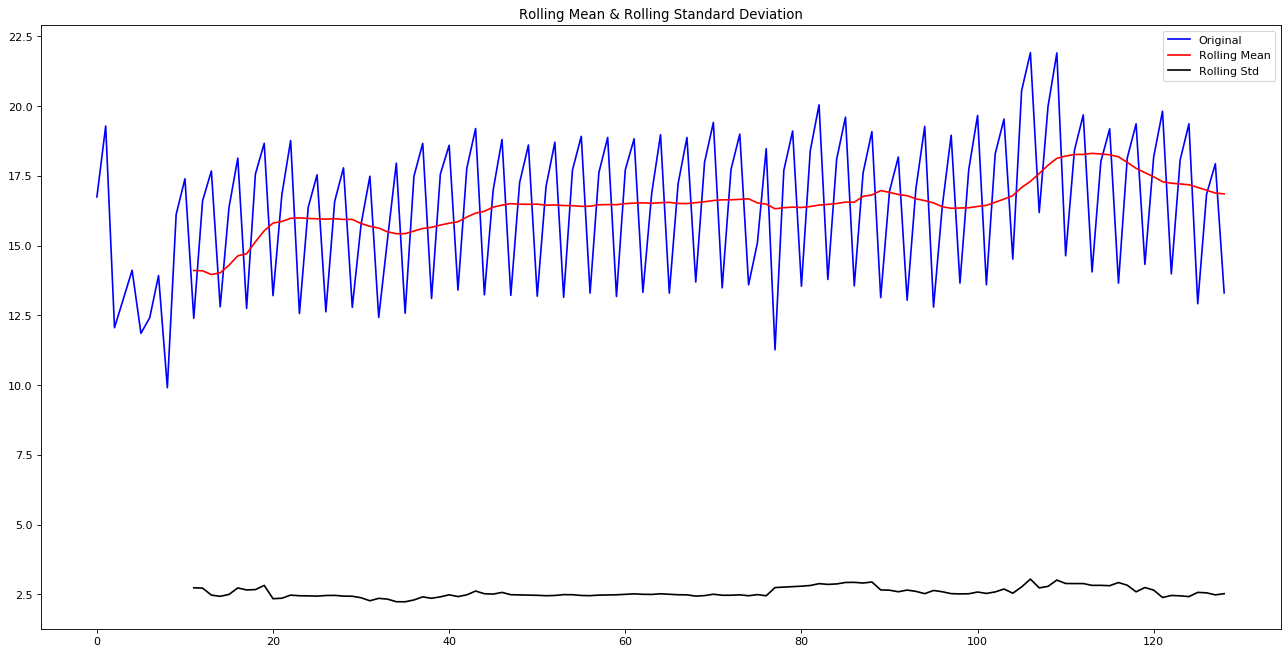

ADF Statistic: -2.4622220148698357
p-value: 0.12493871772846837
Critical Values:
	1%: -3.487517288664615
	5%: -2.8865777180380032
	10%: -2.5801239192052012


In [24]:
isStationary(dataTotalTraffic)

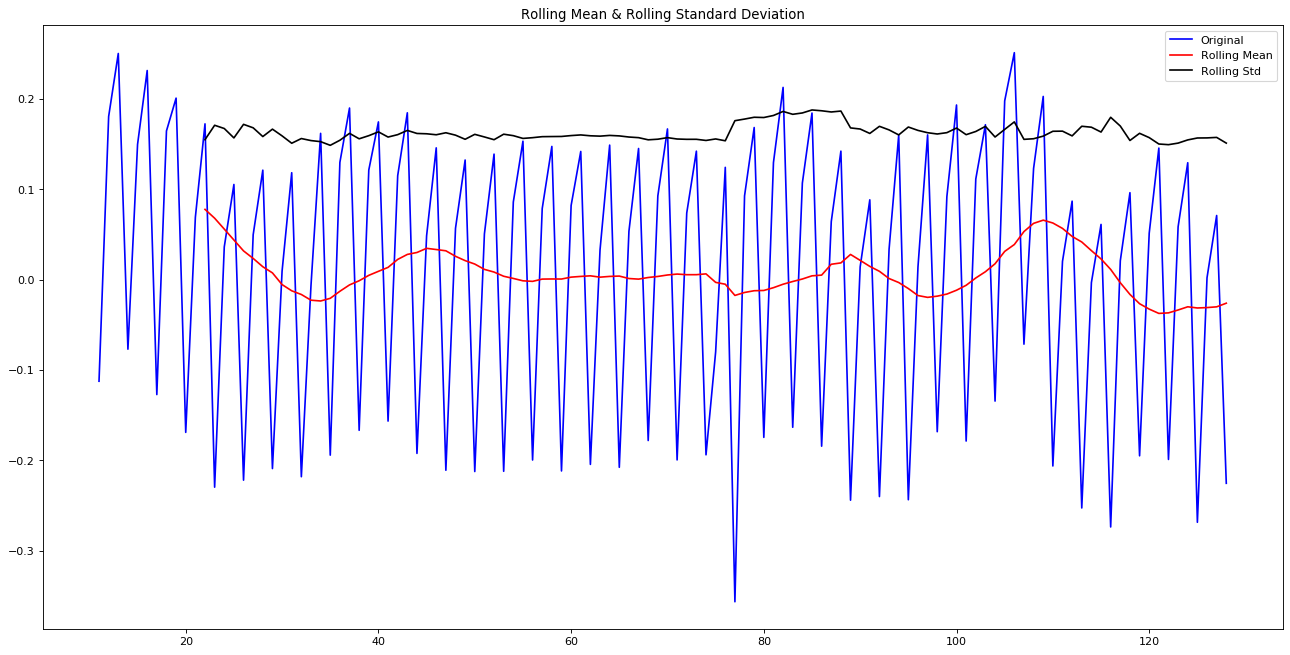

ADF Statistic: -3.556240051851705
p-value: 0.006654889558178774
Critical Values:
	1%: -3.4948504603223145
	5%: -2.889758398668639
	10%: -2.5818220155325444


In [30]:
###########################################################
#In case you want to make sure it is statics, run this cell.
dataTotalTrafficLog = np.log(dataTotalTraffic)
dataLogMinusMean = dataTotalTrafficLog - dataTotalTrafficLog.rolling(window = 12).mean()
dataLogMinusMean.dropna(inplace = True)
isStationary(dataLogMinusMean)
###########################################################

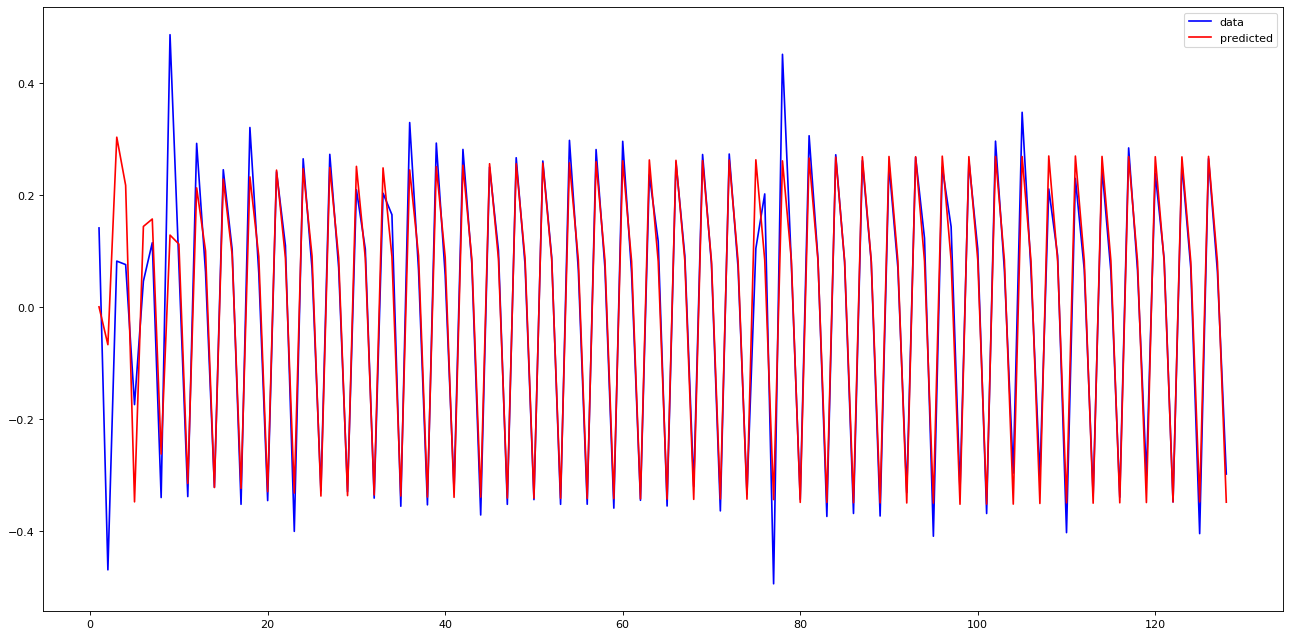

In [49]:
#ARIMA
#decomposition = seasonal_decompose(dataTotalTrafficLog) 
model = ARIMA(dataTotalTrafficLog, order=(2,1,2))
results = model.fit(disp=-1)
dataTotalTrafficLogShift = dataTotalTrafficLog - dataTotalTrafficLog.shift(1)
dataTotalTrafficLogShift.dropna(inplace=True)
plt.figure(num = None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dataTotalTrafficLogShift, color = 'blue', label = 'data')
plt.plot(results.fittedvalues, color='red', label = 'predicted')
plt.legend(loc = 'best')

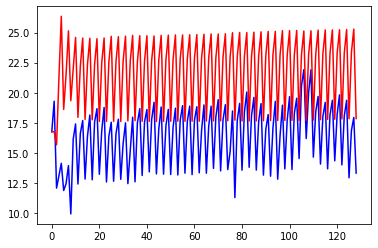

In [55]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dataTotalTrafficLog['Total Traffic'].iloc[0], index=dataTotalTrafficLog.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dataTotalTraffic, color = 'blue')
plt.plot(predictions_ARIMA, color = 'red')

In [ ]:
model = ARMA(dataTotalTrafficLog, order=(2,1,2))
results = model.fit(disp=-1)
dataTotalTrafficLogShift = dataTotalTrafficLog - dataTotalTrafficLog.shift(1)
dataTotalTrafficLogShift.dropna(inplace=True)
plt.figure(num = None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dataTotalTrafficLogShift, color = 'blue', label = 'data')
plt.plot(results.fittedvalues, color='red', label = 'predicted')
plt.legend(loc = 'best')

In [50]:
dataTotalTrafficLog

,Total Traffic
0,2.818398
1,2.959587
2,2.489894
3,2.571849
4,2.647592
...,...
124,2.963725
125,2.558776
126,2.823757
127,2.887033


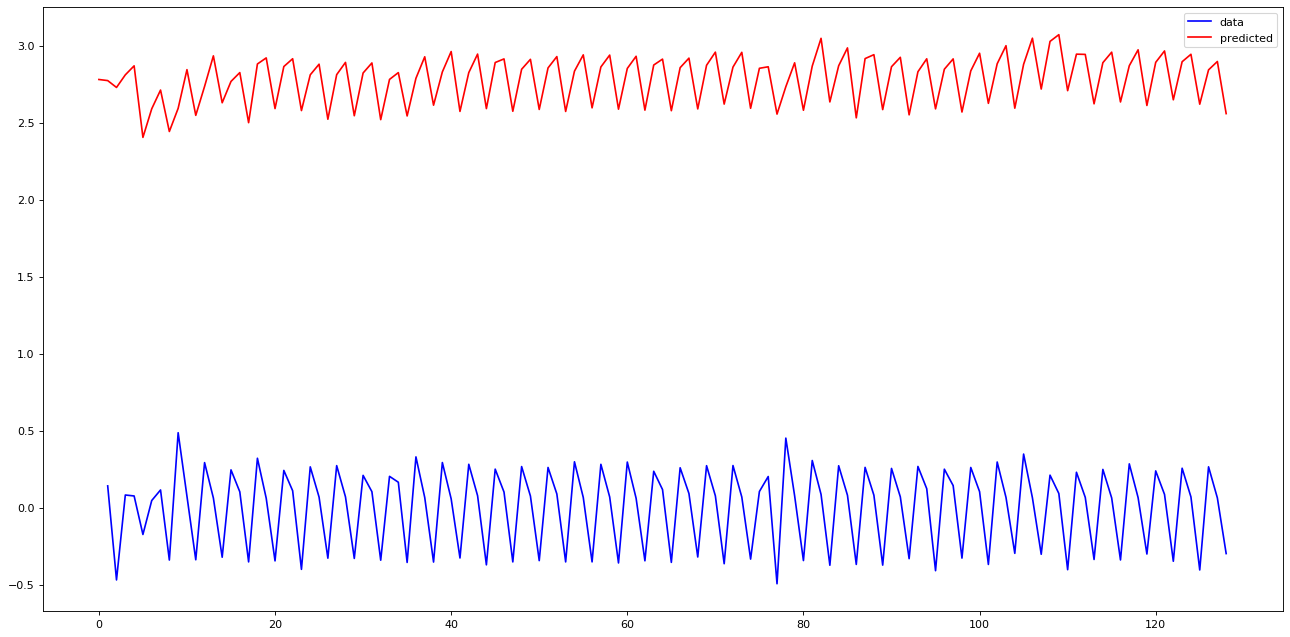

In [72]:
model = ARMA(dataTotalTrafficLog, (10,1))
results = model.fit()
dataTotalTrafficLogShift = dataTotalTrafficLog - dataTotalTrafficLog.shift(1)
dataTotalTrafficLogShift.dropna(inplace=True)
plt.figure(num = None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dataTotalTrafficLogShift, color = 'blue', label = 'data')
plt.plot(results.fittedvalues, color='red', label = 'predicted')
plt.legend(loc = 'best')
